Source: https://data.humdata.org/dataset/satellite-detected-water-extent-over-jawa-tengah-province-indonesia-as-of-27-march-2024

In [10]:
import geopandas as gpd
import pandas as pd
import yaml
from rasterio.crs import CRS
from pathlib import Path
import fiona

In [2]:
yaml_file = '../events/demak_flood_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'demak_flood_2024',
 'bounds': [110.00054153, -7.10254596, 111.30352226, -6.68671509],
 'event_date': '2024-03-15',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [76, 127],
 'mgrs_tiles': ['49MDN', '49MEN'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'UNOSAT via humanitarian data exchange and S1 optical',
 'links': ['https://data.humdata.org/dataset/satellite-detected-water-extent-over-jawa-tengah-province-indonesia-as-of-27-march-2024 - multiple dates via S1',
  'https://unosat.org/products/3810']}

In [12]:
p= '../external_validation_data/unosat/demak/FL20240326IDN.gdb/'
fiona.listlayers(p)

['S1_20240315_FloodExtent_Demak',
 'Confidence_ID',
 'Water_StatusID',
 'Water_Class',
 'Field_Validation',
 'S1_20240319_AnalysisExtent_Demak',
 'S1_20240315_WaterExtent_Demak',
 'S1_20240319_FloodExtent_Demak',
 'S1_20240319_WaterExtent_Demak',
 'S1_20240327_WaterExtent_Demak',
 'S1_20240327_FloodExtent_Demak',
 'fras_aux_IDP_Sites_Template_FC',
 'fras_blk_IDP_Sites_Template_FC',
 'fras_bnd_IDP_Sites_Template_FC',
 'fras_ras_IDP_Sites_Template_FC']

In [13]:
df_flood_0 = gpd.read_file(p, layer='S1_20240315_WaterExtent_Demak')
df_flood_0 = df_flood_0.to_crs(4326)
df_flood_0.head()

,Water_Class,Sensor_ID,Sensor_Date,Confidence_ID,Field_Validation,Water_StatusID,Notes,Area_m2,Area_ha,SenorID_old,StaffID,EventCode,SHAPE_Length,SHAPE_Area,geometry
0,2,42,2024-03-15 00:00:00+00:00,4,0,2,None,4.743859e+08,47438.586458,None,219,FL20240326IDN,148.315129,0.038812,"MULTIPOLYGON (((110.68327 -7.10235, 110.68346 ..."


In [14]:
df_flood_1 = gpd.read_file(p, layer='S1_20240315_WaterExtent_Demak')
df_flood_1 = df_flood_1.to_crs(4326)
df_flood_1.head()

,Water_Class,Sensor_ID,Sensor_Date,Confidence_ID,Field_Validation,Water_StatusID,Notes,Area_m2,Area_ha,SenorID_old,StaffID,EventCode,SHAPE_Length,SHAPE_Area,geometry
0,2,42,2024-03-15 00:00:00+00:00,4,0,2,None,4.743859e+08,47438.586458,None,219,FL20240326IDN,148.315129,0.038812,"MULTIPOLYGON (((110.68327 -7.10235, 110.68346 ..."


In [15]:
# df_flood_coastal = df_flood.cx[89.2:91, 21.5: 24].reset_index(drop=True)
# df_flood_coastal.explore()

In [16]:
df_flood_0.total_bounds

array([110.44327409,  -7.10254596, 111.30361853,  -6.68336863])

In [17]:
n = df_flood_0.shape[0]
df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name'] for k in range(n)],
                               'date': [pd.to_datetime(event_dict['event_date']) for k in range(n)],
                               'source_id': [f'{event_dict["source_id"]}' for k in range(n)]},
                               geometry=df_flood_0.geometry.tolist(),
                               crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,demak_flood_2024,2024-03-15,UNOSAT via humanitarian data exchange and S1 o...,"MULTIPOLYGON (((110.68327 -7.10235, 110.68346 ..."


In [18]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [19]:
df_event_f.to_parquet(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.parquet')

# Extent

In [22]:
df_aoi = gpd.read_file(p, layer='S1_20240319_AnalysisExtent_Demak')
df_aoi = df_aoi.to_crs(4326)
df_aoi.head()

,SensorDate,SensorID,Notes,Area_m2,GlobalID,StaffID,EventCode,SHAPE_Length,SHAPE_Area,Area_ha,geometry
0,2024-03-19 00:00:00+00:00,42,None,4.403020e+09,{08798F9E-FCC1-454B-B0DE-16E408DC8C90},219,FL20240326IDN,2.558338,0.360236,440302.0625,"MULTIPOLYGON (((110.44276 -6.68483, 111.30332 ..."


<Axes: >

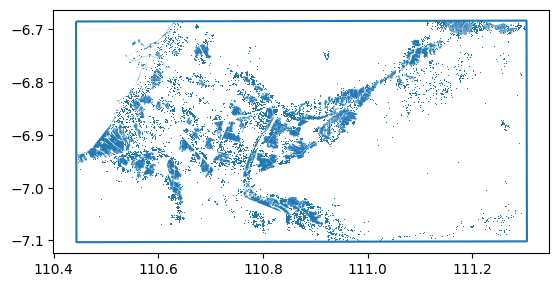

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event_f.plot(ax=ax)

In [24]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')